In [31]:
#import

import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [32]:
base_dir = 'C://Users/minhu/OneDrive/Desktop/j_project'

train_dir = os.path.join(base_dir, 'train2')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 OK/NG 이미지 경로

train_ok_up_dir = os.path.join(train_dir, 'OK_UP')
train_ok_down_dir = os.path.join(train_dir, 'OK_DOWN')
train_ng_up_dir = os.path.join(train_dir, 'NG_UP')
train_ng_down_dir = os.path.join(train_dir, 'NG_DOWN')
train_check_up_dir = os.path.join(train_dir, 'CHECK_UP')
train_check_down_dir = os.path.join(train_dir, 'CHECK_DOWN')

print(train_ok_up_dir)
print(train_ok_down_dir)
print(train_ng_up_dir)
print(train_ng_down_dir)
print(train_check_up_dir)
print(train_check_down_dir)

# 검증에 사용되는 OK/NG 이미지 경로(검증용 사진 사용 시)

#validation_ok_up_dir = os.path.join(validation_dir, 'OK_UP')
#validation_ng_up_dir = os.path.join(validation_dir, 'NG_UP')
#validation_ok_down_dir = os.path.join(validation_dir, 'OK_DOWN')
#validation_ng_down_dir = os.path.join(validation_dir, 'NG_DOWN')
#print(validation_ok_up_dir)
#print(validation_ng_up_dir)
#print(validation_ok_down_dir)
#print(validation_ng_down_dir)


C://Users/minhu/OneDrive/Desktop/j_project\train2\OK_UP
C://Users/minhu/OneDrive/Desktop/j_project\train2\OK_DOWN
C://Users/minhu/OneDrive/Desktop/j_project\train2\NG_UP
C://Users/minhu/OneDrive/Desktop/j_project\train2\NG_DOWN
C://Users/minhu/OneDrive/Desktop/j_project\train2\CHECK_UP
C://Users/minhu/OneDrive/Desktop/j_project\train2\CHECK_DOWN


In [33]:
# train 파일 이름

train_ok_up_fnames = os.listdir( train_ok_up_dir )
train_ng_up_fnames = os.listdir( train_ng_up_dir )
train_ok_down_fnames = os.listdir( train_ok_down_dir)
train_ng_down_fnames = os.listdir( train_ng_down_dir)
train_check_up_fnames = os.listdir( train_ng_down_dir)
train_check_down_fnames = os.listdir( train_ng_down_dir)

print(train_ok_up_fnames[:5])
print(train_ng_up_fnames[:5])
print(train_ok_down_fnames[:5])
print(train_ng_down_fnames[:5])

['2_110457.png', '2_110459.png', '2_111011.png', '2_111014.png', '2_112018.png']
['2_110424.png', '2_110426.png', '2_110428.png', '2_110431.png', '2_110453.png']
['1_092021.png', '1_092424.png', '1_092426.png', '1_092428.png', '1_092430.png']
['1_092003.png', '1_092006.png', '1_092012.png', '1_092018.png', '1_092021.png']


In [34]:
# 파일 갯수

print('Total training ok_up images :', len(os.listdir(train_ok_up_dir)))
print('Total training ng_up images :', len(os.listdir(train_ng_up_dir)))
print('Total training ok_down images :', len(os.listdir(train_ok_down_dir)))
print('Total training ng_down images :', len(os.listdir(train_ng_down_dir)))
print('Total training check_up images :', len(os.listdir(train_check_up_dir)))
print('Total training check_down images :', len(os.listdir(train_check_down_dir)))

#print('Total validation ok_up images :', len(os.listdir(validation_ok_up_dir)))
#print('Total validation ng_up images :', len(os.listdir(validation_ng_up_dir)))
#print('Total validation ok_down images :', len(os.listdir(validation_ok_down_dir)))
#print('Total validation ng_down images :', len(os.listdir(validation_ng_down_dir)))

Total training ok_up images : 254
Total training ng_up images : 160
Total training ok_down images : 517
Total training ng_down images : 117
Total training check_up images : 2
Total training check_down images : 94


In [35]:
#데이터 전처리

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2, #검증분할(80%훈련 20%검증)
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=20)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, # 검증분할 시
    #validation_dir, # 검증용 사진을 사용 할 시
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=20)

class_names = train_ds.class_names
print(class_names)

Found 1144 files belonging to 6 classes.
Using 916 files for training.
Found 1144 files belonging to 6 classes.
Using 228 files for validation.
['CHECK_DOWN', 'CHECK_UP', 'NG_DOWN', 'NG_UP', 'OK_DOWN', 'OK_UP']


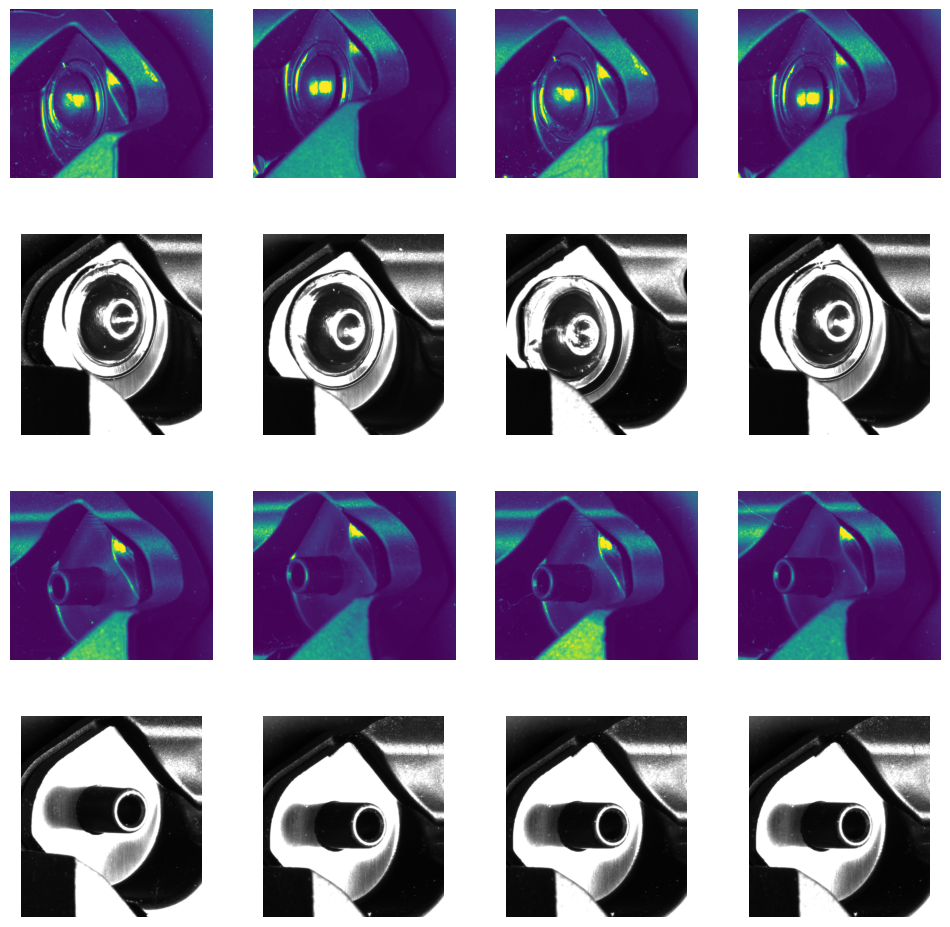

In [36]:
# 이미지 확인

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=4

next_ok_up_pix = [os.path.join(train_ok_up_dir, fname)
                for fname in train_ok_up_fnames[ pic_index-4:pic_index]]

next_ok_down_pix = [os.path.join(train_ok_down_dir, fname)
                for fname in train_ok_down_fnames[ pic_index-4:pic_index]]

next_ng_up_pix = [os.path.join(train_ng_up_dir, fname)
                for fname in train_ng_up_fnames[ pic_index-4:pic_index]]

next_ng_down_pix = [os.path.join(train_ng_down_dir, fname)
                for fname in train_ng_down_fnames[ pic_index-4:pic_index]]

for i, img_path in enumerate(next_ok_up_pix+next_ok_down_pix+next_ng_up_pix+next_ng_down_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

0.0 1.0


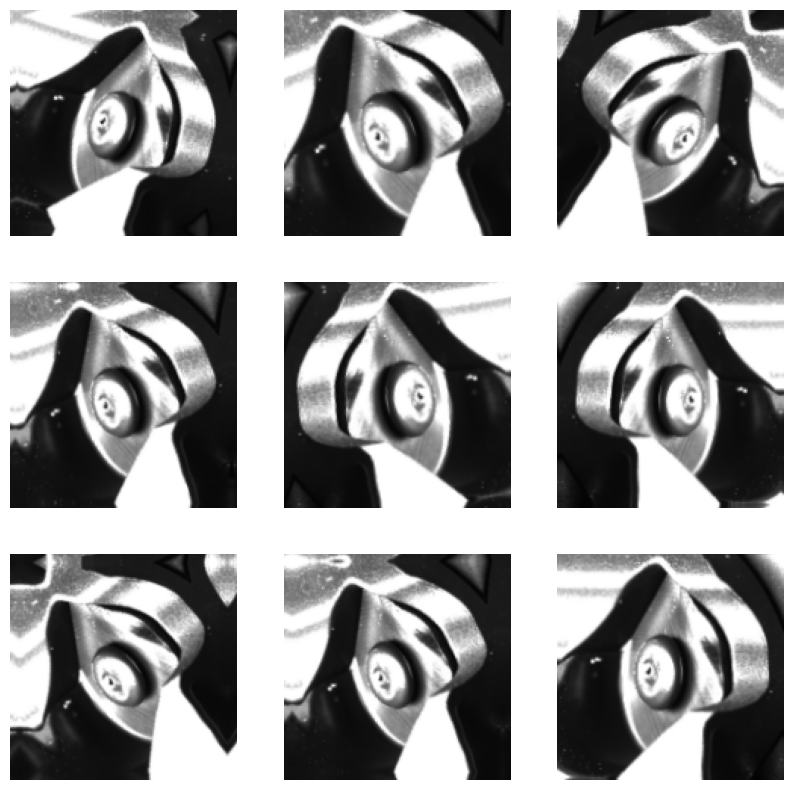

In [37]:
#정규화

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

#데이터 증강

data_augmentation = tf.keras.models.Sequential(
  [
    
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [38]:
#모델링

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  #layers.Rescaling(1./255),
  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, activation = 'relu', input_shape=(32,32,3)),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(6, activation='softmax'),
  layers.Dense(num_classes, name="outputs")
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)       

In [39]:
#모델 컴파일

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

model.save('C://Users/minhu/OneDrive/Desktop/j_project/model.h5')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 64)       

In [40]:
# 모델 훈련

epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
46/46 [==============================] - 34s 661ms/step - loss: 1.7620 - accuracy: 0.0000e+00 - val_loss: 1.6892 - val_accuracy: 0.0000e+00
Epoch 2/15
46/46 [==============================] - 28s 605ms/step - loss: 1.7049 - accuracy: 0.0000e+00 - val_loss: 1.6398 - val_accuracy: 0.0000e+00
Epoch 3/15
46/46 [==============================] - 28s 585ms/step - loss: 1.6613 - accuracy: 0.0000e+00 - val_loss: 1.5979 - val_accuracy: 0.0000e+00
Epoch 4/15
46/46 [==============================] - 27s 573ms/step - loss: 1.6246 - accuracy: 0.0000e+00 - val_loss: 1.5628 - val_accuracy: 0.0000e+00
Epoch 5/15
46/46 [==============================] - 27s 573ms/step - loss: 1.5942 - accuracy: 0.0000e+00 - val_loss: 1.5343 - val_accuracy: 0.0000e+00
Epoch 6/15
46/46 [==============================] - 27s 579ms/step - loss: 1.5692 - accuracy: 0.0000e+00 - val_loss: 1.5105 - val_accuracy: 0.0000e+00
Epoch 7/15
46/46 [==============================] - 27s 574ms/step - loss: 1.5485 - accuracy: 

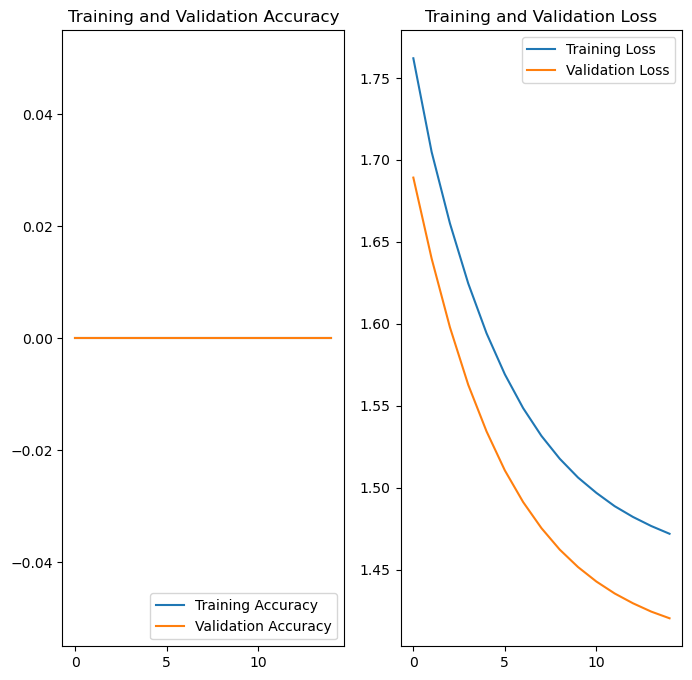

In [41]:
# 훈련 정확도와 손실률

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = epochs
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [22]:
#예측 분류

from tensorflow.keras.preprocessing import image

img_data = image.load_img('C://Users/minhu/OneDrive/Desktop/j_automation/photo/1_101918.png',
                    target_size=(150, 150)) #예측할 사진의 경로

img_array = tf.keras.utils.img_to_array(img_data)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "해당 사진은 {} / 확률: {:.2f}%."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 355ms/step
해당 사진은 OK_DOWN / 확률: 72.47%.


In [ ]:
image_dir = "C://Users/minhu/OneDrive/Desktop/j_automation/photo/"
for file in os.listdir(image_dir):
    if (file.find('.png') is not -1):       
        src.append(image_dir + file)
        name.append(file)
        test.append(Dataization(image_dir + file))
 
 
test = np.array(test)
model = load_model('Gersang.h5')
predict = model.predict_classes(test)
 
for i in range(len(test)):
    print(name[i] + " : , Predict : "+ str(categories[predict[i]]))